In [17]:
#!pip install python-twitter

In [1]:
import pandas as pd
import random
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output, State

import twitter
from psyMLScrapper import annotateUsers,annotatePersonality

import math

from unidecode import unidecode
import numpy as np

In [30]:
users = [957750487373307906, 959322796236201985, 54609527, 764369602088493056, 2514066086, 
         959826676329754625, 92285090, 932971595605344256, 880083225506349057, 
         957772639833014273, 942877804609368064]

In [31]:
personality=annotatePersonality(users)

In [2]:
neo4j=pd.read_csv('data_personality_twitter.csv')
neo4j=neo4j.rename(index=str, columns={"ch.personality_honesty": "Honesty", "ch.personality_neuroticism": "Neuroticism",
                                  'ch.personality_extraversion':'Extraversion','ch.personality_agreeableness':'Agreeableness',
                                  'ch.personality_conscientiousness':'Conscientiousness','ch.personality_openness':'Openness'})

In [3]:
baseline=pd.read_csv('baseline.csv')
baseline1=pd.read_csv('baseline1.csv')
baselinetotal=baseline.append(baseline1)

In [4]:
ptr = pd.read_gbq('SELECT * FROM Follower.Personality_PTRskin', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
ptr=ptr.drop_duplicates(subset='userid', keep="last").reset_index(drop=True)
tarte = pd.read_gbq('SELECT * FROM Follower.Personality_tartecosmetics', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
tarte=tarte.drop_duplicates(subset='userid', keep="last").reset_index(drop=True)
drunk = pd.read_gbq('SELECT * FROM Follower.Personality_mydrunkelephant', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
drunk=drunk.drop_duplicates(subset='userid', keep="last").reset_index(drop=True)

In [46]:
data=[]
name=[]
data.append(ptr)
name.append('PTR')
data.append(tarte)
name.append('tartecosmetics')
data.append(drunk)
name.append('mydrunkelephant')
data.append(neo4j)
name.append('neo4j')
# data.append(baseline)
# name.append('baseline')
# data.append(baseline1)
# name.append('baseline1')
data.append(baselinetotal)
name.append('baseline')
plotPersonality(data,name)

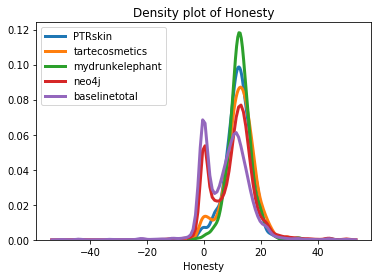

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(ptr['Honesty'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Honesty'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Honesty'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Honesty'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Honesty'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')


plt.title('Density plot of Honesty')

plt.show()

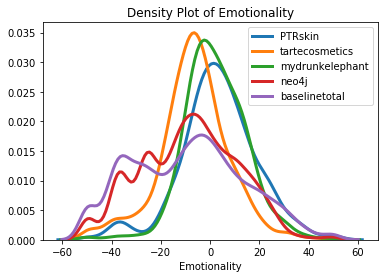

In [58]:
sns.distplot(ptr['Neuroticism'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Neuroticism'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Neuroticism'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Neuroticism'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Neuroticism'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')

plt.title('Density Plot of Emotionality')
plt.xlabel('Emotionality')
plt.show()

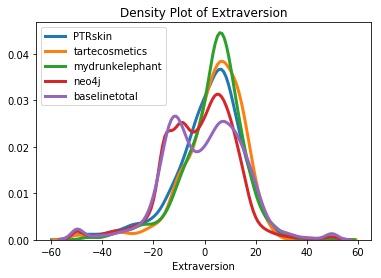

In [59]:
sns.distplot(ptr['Extraversion'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Extraversion'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Extraversion'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Extraversion'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Extraversion'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')

plt.title('Density Plot of Extraversion')
plt.show()

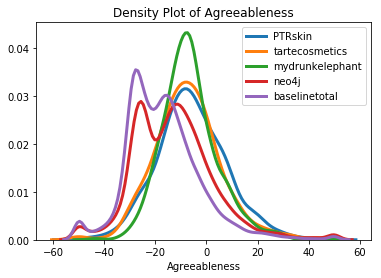

In [60]:
sns.distplot(ptr['Agreeableness'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Agreeableness'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Agreeableness'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Agreeableness'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Agreeableness'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')

plt.title('Density Plot of Agreeableness')
plt.show()

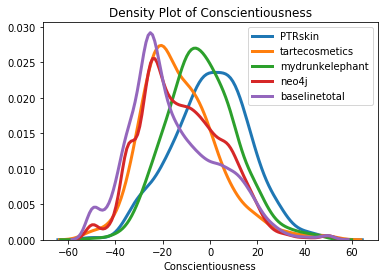

In [61]:
sns.distplot(ptr['Conscientiousness'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Conscientiousness'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Conscientiousness'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Conscientiousness'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Conscientiousness'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')

plt.title('Density Plot of Conscientiousness')
plt.show()

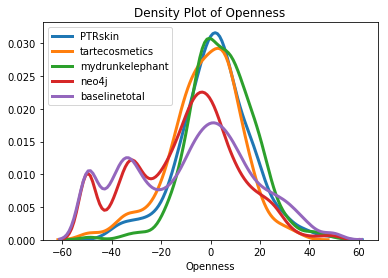

In [62]:
sns.distplot(ptr['Openness'],hist=False,kde=True,kde_kws={'linewidth':3},label='PTRskin')
sns.distplot(tarte['Openness'],hist=False,kde=True,kde_kws={'linewidth':3},label='tartecosmetics')
sns.distplot(drunk['Openness'],hist=False,kde=True,kde_kws={'linewidth':3},label='mydrunkelephant')
sns.distplot(neo4j['Openness'],hist=False,kde=True,kde_kws={'linewidth':3},label='neo4j')
sns.distplot(baselinetotal['Openness'],hist=False,kde=True,kde_kws={'linewidth':3},label='baselinetotal')

plt.title('Density Plot of Openness')
plt.show()

In [44]:
def plotPersonality(df,username):
    data=[]
    for i in range(len(df)):
        summ=df[i].describe()
        sqrt2=math.sqrt(len(df[i]))
        
        AgreeVal=summ['Agreeableness']['mean']
        ConVal=summ['Conscientiousness']['mean']
        ExtraVal=summ['Extraversion']['mean']
        HonestVal=summ['Honesty']['mean']
        NeuVal=summ['Neuroticism']['mean']
        OpenVal=summ['Openness']['mean']

        AgreeStd=2*summ['Agreeableness']['std']/sqrt2
        ConStd=2*summ['Conscientiousness']['std']/sqrt2
        ExtraStd=2*summ['Extraversion']['std']/sqrt2
        HonestStd=2*summ['Honesty']['std']/sqrt2
        NeuStd=2*summ['Neuroticism']['std']/sqrt2
        OpenStd=2*summ['Openness']['std']/sqrt2 
    
        bardata=go.Bar(
              name = '@'+username[i]+'| N = '+str(len(df[i])),
              y = [AgreeVal, ConVal, ExtraVal, HonestVal,NeuVal,OpenVal],
              x = ["Agreeableness", "Conscientiousness", "Extraversion", "Honesty", 'Emotionality',"Openness"],
              error_y=dict(
              type='data',
              array=[AgreeStd, ConStd, ExtraStd, HonestStd,NeuStd,OpenStd],
              visible=True
              )
            )
        data.append(bardata)
    layout=go.Layout(
        title='Personality Scores',
        showlegend=True,
        legend=go.Legend(
            x=0,
            y=1.0
        ),
#             margin=go.Margin(l=40, r=0, t=40, b=30)
        )




    fig = go.Figure(data=data,layout=layout)
    #return fig
    return py.iplot(fig, filename='polar')

In [2]:
def plotEmotions(df,username):
    data=[]
    for i in range(len(df)):
        summ=df[i].describe()
        sqrt2=math.sqrt(len(df[i]))
        
        AngerVal=summ['anger_overall_val']['mean']
        FearVal=summ['fear_overall_val']['mean']
        DisgustVal=summ['disgust_overall_val']['mean']
        HappinessVal=summ['happy_overall_val']['mean']
        SadnessVal=summ['sad_overall_val']['mean']
        SentimentVal=summ['sentiment_overall_val']['mean']

        AngerStd=2*summ['anger_overall_val']['std']/sqrt2
        FearStd=2*summ['fear_overall_val']['std']/sqrt2
        DisgustStd=2*summ['disgust_overall_val']['std']/sqrt2
        HappinessStd=2*summ['happy_overall_val']['std']/sqrt2
        SadnessStd=2*summ['sad_overall_val']['std']/sqrt2
        SentimentStd=2*summ['sentiment_overall_val']['std']/sqrt2 
    
        bardata=go.Bar(
              name = '@'+username[i]+'| N = '+str(len(df[i])),
              y = [AngerVal, FearVal, DisgustVal, HappinessVal,SadnessVal,SentimentVal],
              x = ["Anger", "Fear", "Digust", "Happiness", 'Sadness',"Sentiment"],
              error_y=dict(
              type='data',
              array=[AngerStd, FearStd, DisgustStd, HappinessStd,SadnessStd,SentimentStd],
              visible=True
              )
            )
        data.append(bardata)
    layout=go.Layout(
        title='Emotion scores of followers',
        showlegend=True,
        legend=go.Legend(
            x=0,
            y=1.0
        ),
#             margin=go.Margin(l=40, r=0, t=40, b=30)
        )




    fig = go.Figure(data=data,layout=layout)
    return fig
    #return py.iplot(fig, filename='polar')

In [5]:
app = dash.Dash()
app.config['suppress_callback_exceptions']=True
app.scripts.config.serve_locally = True
app.layout = html.Div([
    html.H2("psyML Emotional Audience Matching",style={'font-family': "Montserrat",'color': '#377554'}),
    #html.P("psyML’s suite of psychometric tools take your data every step of the way from a raw csv to readable insights. First it cleans the data, then it extracts psychological traits, then it generates graphical models of the relationships between your variables. When the tab says “Updating…” the program is working."),
    #html.Hr(),

    html.Br(),
    html.P('Enter one or more username(s) of any twitter account (preferably with >500 followers) to generate insights on the emotionality or personality of followers, separated with comma',style={'font-family': "Montserrat",'color': '#377554'}),
    dcc.Input(id='username',placeholder='Exp., @realDonaldTrump ',
            type='text',value=''),
    dcc.RadioItems(id='option',
        options=[
            {'label':'Emotionality','value':'emotion'},
            {'label':'Personality','value':'personality'}
        ],
        value = '',
        labelStyle={'display':'inline-block'}
    ),
    html.Div([dcc.Checklist(id='check',
        options=[
        {'label': 'Compare with general twitter audience', 'value': 'general'},
    ],
    values=[])],id='compare',style={'display': 'none'}),
    html.Br(),
    html.Button(id='button', type='submit', children='Generate insights'),
    html.Br(),
    html.Div(id='output'),
    html.Div(id='output1'),
    
    ])


@app.callback(Output('compare','style'),
            [Input('option','value')])
def latview1(option):
    if option == 'emotion':
        return {'display': 'inline'} 
    else:
        return {'display': 'none'}

@app.callback(Output('output','children'),
            [Input('button','n_clicks')],
            [State('username','value'),
             State('option','value'),
             State('check','values')])
def generate(click,value,option,check):
    if click!=None:
        if option == 'emotion':
            valuelist = value.split(",")
            data=[]
            username=[]
            for i in range(len(valuelist)):
                username_sub=''.join(e for e in valuelist[i] if e.isalnum())
                print username_sub
                try:
                    emotion = pd.read_gbq('SELECT * FROM Follower.Emotion_'+str(username_sub), \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
                    #emotion=pd.read_csv(str(username_sub)+'.csv',encoding='utf-8')
                    emotion=emotion.drop_duplicates(subset='userid', keep="last")
                    if len(emotion)>=500:
                        print 'success1'
                    else:
                        raise Exception
                except:
                    api1 = twitter.Api(consumer_key='ZT1NLFm68y4So2oL1rO0weNn7',
                                      consumer_secret='xsudo3dLmxR4dRcn4MhEtR4QcaU13jhn0Xvui5PgxfnUNO40Gq',
                                      access_token_key='1064699917-XV1PgI8tEX03ipYoI92fmCV37eIgKk5LMbvSO0X',
                                      access_token_secret='QzLvJIOzRiBO3wXj5R519G7yirfQpyjXQcNBULfsUbUkd',
                                     sleep_on_rate_limit=False)
                    api2 = twitter.Api(consumer_key='c47jBV7uuOTKXe1Wu9aDDr7gz',
                                      consumer_secret='Pqp0vbbnYU8I23j0fru8ZoDUmICBldPKcJsxB2wH1aeIWe7gpP',
                                      access_token_key='2307106790-7eoWk1arHx4Q2l85mnz3dBJpBiBGLcInNs3mBE8',
                                      access_token_secret='UjeAdEOmI6ojKOAQxx9VdK5w3Pli6OTxxVFnfkURPFzTh',
                                     sleep_on_rate_limit=False)
                    api3 = twitter.Api(consumer_key='7hr8w997AHFj8jafLp8FnXeUn',
                                      consumer_secret='395YZkEiYwQKkm0AFA9l6bHiUPJkTRjD5RFJylDViK2bPw6G68',
                                      access_token_key='2307106790-TSpBUcVpX7q2WAa6fWpebo1glYDLeM8hIK3di3l',
                                      access_token_secret='bFhrMiukhoatCaGDmrwap8Q5I9tmB8Mw38px5ZUUXDBpQ',
                                     sleep_on_rate_limit=False)
                    apis=[api1,api2,api3]
                    api=apis[random.randint(0,2)]
                    try:
                        follower = api.GetFollowerIDs(screen_name=username_sub,total_count=5000)
                    except:
                        follower = api.GetFollowerIDs(screen_name=username_sub)
                    print follower
                    follower_sample = random.sample(follower,5000)
                    print len(follower_sample)
                    emotion = annotateUsers(follower_sample,requiredNum = 500) 
                    for k in ['profile','username','name']:
                        emotion[k] = emotion[k].map(unidecode).replace(r'\s+', np.nan, regex=True)
                    for k in ['followers_count','following_count','tweets_count','userid']:
                        emotion[k] = emotion[k].map(int)
                    emotion.to_gbq('Follower.Emotion_'+str(username_sub), 'samjinshu', if_exists='append', private_key='bigquery-credentials.json')
                    #emotion.to_csv(str(username_sub)+'_emotion.csv',encoding='utf-8')
                    print 'success2'
                    emotion = pd.read_gbq('SELECT * FROM Follower.Emotion_'+str(username_sub), \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
                    #emotion=pd.read_csv(str(username_sub)+'.csv',encoding='utf-8')
                    emotion=emotion.drop_duplicates(subset='userid', keep="last")
                data.append(emotion)
                username.append(username_sub)
                print username
            if len(check)!=0:
                #archive=pd.read_csv('FullArchive.csv')
                archive = pd.read_gbq('SELECT * FROM TwitterTimeline.Timeline', \
                                      project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
                data.append(archive)
                username.append('general twitter users')
            print username
            return html.Div([
            dcc.Graph(
                id='basic-interactions',
                figure=plotEmotions(data,username)
            ),
            ])
        elif option == 'personality':
            valuelist = value.split(",")
            data=[]
            username=[]
            for i in range(len(valuelist)):
                username_sub=''.join(e for e in valuelist[i] if e.isalnum())
                print username_sub
                try:
                    personality = pd.read_gbq('SELECT * FROM Follower.Personality_'+str(username_sub), \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
                    #personality=pd.read_csv(str(username_sub)+'_personality.csv',encoding='utf-8')
                    p_gbq=personality.drop_duplicates(subset='userid', keep="last")
                    if len(p_gbq)>=500:
                        print 'success1'
                    else:
                        raise Exception
                except:
                    api1 = twitter.Api(consumer_key='ZT1NLFm68y4So2oL1rO0weNn7',
                                      consumer_secret='xsudo3dLmxR4dRcn4MhEtR4QcaU13jhn0Xvui5PgxfnUNO40Gq',
                                      access_token_key='1064699917-XV1PgI8tEX03ipYoI92fmCV37eIgKk5LMbvSO0X',
                                      access_token_secret='QzLvJIOzRiBO3wXj5R519G7yirfQpyjXQcNBULfsUbUkd',
                                     sleep_on_rate_limit=False)
                    api2 = twitter.Api(consumer_key='c47jBV7uuOTKXe1Wu9aDDr7gz',
                                      consumer_secret='Pqp0vbbnYU8I23j0fru8ZoDUmICBldPKcJsxB2wH1aeIWe7gpP',
                                      access_token_key='2307106790-7eoWk1arHx4Q2l85mnz3dBJpBiBGLcInNs3mBE8',
                                      access_token_secret='UjeAdEOmI6ojKOAQxx9VdK5w3Pli6OTxxVFnfkURPFzTh',
                                     sleep_on_rate_limit=False)
                    api3 = twitter.Api(consumer_key='7hr8w997AHFj8jafLp8FnXeUn',
                                      consumer_secret='395YZkEiYwQKkm0AFA9l6bHiUPJkTRjD5RFJylDViK2bPw6G68',
                                      access_token_key='2307106790-TSpBUcVpX7q2WAa6fWpebo1glYDLeM8hIK3di3l',
                                      access_token_secret='bFhrMiukhoatCaGDmrwap8Q5I9tmB8Mw38px5ZUUXDBpQ',
                                     sleep_on_rate_limit=False)
                    apis=[api1,api2,api3]
                    api=apis[random.randint(0,2)]
                    try:
                        follower = api.GetFollowerIDs(screen_name=username_sub,total_count=5000)
                    except:
                        follower = api.GetFollowerIDs(screen_name=username_sub)
                    print follower
                    follower_sample = random.sample(follower,5000)
                    print len(follower_sample)
                    personality = annotatePersonality(follower_sample,CHUNK_SIZE = 100,requiredNum = 500) 
                    for k in ['profile','username','name']:
                        personality[k] = personality[k].map(unidecode).replace(r'\s+', np.nan, regex=True)
                    for k in ['followers_count','following_count','tweets_count','userid']:
                        personality[k] = personality[k].map(int)
                    personality.to_gbq('Follower.Personality_'+str(username_sub), 'samjinshu', if_exists='append', private_key='bigquery-credentials.json')
                    #personality.to_csv(str(username_sub)+'_personality.csv',encoding='utf-8')
                    print 'success2'
                    p_gbq = pd.read_gbq('SELECT * FROM Follower.Personality_'+str(username_sub), \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
                    #personality=pd.read_csv(str(username_sub)+'_personality.csv',encoding='utf-8')
                    p_gbq=personality.drop_duplicates(subset='userid', keep="last")
                data.append(p_gbq)
                print data
                username.append(username_sub)
                #print username
#             if len(check)!=0:
#                 #archive=pd.read_csv('FullArchive.csv')
#                 archive = pd.read_gbq('SELECT * FROM TwitterTimeline.Timeline', \
#                                       project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
#                 data.append(archive)
#                 username.append('general twitter users')
#             print username
            return html.Div([
            dcc.Graph(
                id='basic-interactions',
                figure=plotPersonality(data,username)
            ),
            ])                
        

# @app.callback(Output('output1','children'),
#             [Input('button','n_clicks')],
#             [State('username','value'),
#              State('option','value')])
# def generate(click,value,option):  
#     if click!=None:
#         if option == 'emotion':
#             valuelist = value.split(",")
#             username=[]
#             for i in range(len(valuelist)):
#                 username_sub=''.join(e for e in valuelist[i] if e.isalnum())
#                 print username_sub
#                 try:
#                     #with open(str(username_sub)+'_emotion.csv', 'a') as f:

#                     api1 = twitter.Api(consumer_key='ZT1NLFm68y4So2oL1rO0weNn7',
#                                     consumer_secret='xsudo3dLmxR4dRcn4MhEtR4QcaU13jhn0Xvui5PgxfnUNO40Gq',
#                                     access_token_key='1064699917-XV1PgI8tEX03ipYoI92fmCV37eIgKk5LMbvSO0X',
#                                     access_token_secret='QzLvJIOzRiBO3wXj5R519G7yirfQpyjXQcNBULfsUbUkd',
#                                     sleep_on_rate_limit=False)
#                     api2 = twitter.Api(consumer_key='c47jBV7uuOTKXe1Wu9aDDr7gz',
#                                     consumer_secret='Pqp0vbbnYU8I23j0fru8ZoDUmICBldPKcJsxB2wH1aeIWe7gpP',
#                                     access_token_key='2307106790-7eoWk1arHx4Q2l85mnz3dBJpBiBGLcInNs3mBE8',
#                                     access_token_secret='UjeAdEOmI6ojKOAQxx9VdK5w3Pli6OTxxVFnfkURPFzTh',
#                                     sleep_on_rate_limit=False)
#                     api3 = twitter.Api(consumer_key='7hr8w997AHFj8jafLp8FnXeUn',
#                                     consumer_secret='395YZkEiYwQKkm0AFA9l6bHiUPJkTRjD5RFJylDViK2bPw6G68',
#                                     access_token_key='2307106790-TSpBUcVpX7q2WAa6fWpebo1glYDLeM8hIK3di3l',
#                                     access_token_secret='bFhrMiukhoatCaGDmrwap8Q5I9tmB8Mw38px5ZUUXDBpQ',
#                                     sleep_on_rate_limit=False)
#                     apis=[api1,api2,api3]
#                     api=apis[random.randint(0,2)]                    
#                     follower = api.GetFollowerIDs(screen_name=username_sub,total_count=500)
#                     follower_sample=random.sample(follower,100)
#                     emotion = annotateUsers(follower_sample,CHUNK_SIZE = 10,requiredNum = 10) 
#                     for k in ['profile','username','name']:
#                         emotion[k] = emotion[k].map(unidecode).replace(r'\s+', np.nan, regex=True)
#                     for k in ['followers_count','following_count','tweets_count','userid']:
#                         emotion[k] = emotion[k].map(int)
#                     emotion.to_gbq('Follower.Emotion_'+str(username_sub), 'samjinshu', if_exists='append', private_key='bigquery-credentials.json')
#                     #emotion.to_csv(f, header=False,encoding='utf-8')
#                     print 'success'
#                 except:
#                     print 'failure'
#         elif option == 'personality':
#             valuelist = value.split(",")
#             username=[]
#             for i in range(len(valuelist)):
#                 username_sub=''.join(e for e in valuelist[i] if e.isalnum())
#                 print username_sub
#                 try:
#                     #with open(str(username_sub)+'_personality.csv', 'a') as f:

#                     api1 = twitter.Api(consumer_key='ZT1NLFm68y4So2oL1rO0weNn7',
#                                     consumer_secret='xsudo3dLmxR4dRcn4MhEtR4QcaU13jhn0Xvui5PgxfnUNO40Gq',
#                                     access_token_key='1064699917-XV1PgI8tEX03ipYoI92fmCV37eIgKk5LMbvSO0X',
#                                     access_token_secret='QzLvJIOzRiBO3wXj5R519G7yirfQpyjXQcNBULfsUbUkd',
#                                     sleep_on_rate_limit=False)
#                     api2 = twitter.Api(consumer_key='c47jBV7uuOTKXe1Wu9aDDr7gz',
#                                     consumer_secret='Pqp0vbbnYU8I23j0fru8ZoDUmICBldPKcJsxB2wH1aeIWe7gpP',
#                                     access_token_key='2307106790-7eoWk1arHx4Q2l85mnz3dBJpBiBGLcInNs3mBE8',
#                                     access_token_secret='UjeAdEOmI6ojKOAQxx9VdK5w3Pli6OTxxVFnfkURPFzTh',
#                                     sleep_on_rate_limit=False)
#                     api3 = twitter.Api(consumer_key='7hr8w997AHFj8jafLp8FnXeUn',
#                                     consumer_secret='395YZkEiYwQKkm0AFA9l6bHiUPJkTRjD5RFJylDViK2bPw6G68',
#                                     access_token_key='2307106790-TSpBUcVpX7q2WAa6fWpebo1glYDLeM8hIK3di3l',
#                                     access_token_secret='bFhrMiukhoatCaGDmrwap8Q5I9tmB8Mw38px5ZUUXDBpQ',
#                                     sleep_on_rate_limit=False)
#                     apis=[api1,api2,api3]
#                     api=apis[random.randint(0,2)]                    
#                     follower = api.GetFollowerIDs(screen_name=username_sub,total_count=500)
#                     follower_sample=random.sample(follower,100)
#                     personality = annotatePersonality(follower_sample,CHUNK_SIZE = 10,requiredNum = 10)
#                     print personality
#                     for k in ['profile','username','name']:
#                         personality[k] = personality[k].map(unidecode).replace(r'\s+', np.nan, regex=True)
#                     for k in ['followers_count','following_count','tweets_count','userid']:
#                         personality[k] = personality[k].map(int)
#                     personality.to_gbq('Follower.Personality_'+str(username_sub), 'samjinshu', if_exists='append', private_key='bigquery-credentials.json')
#                     #personality.to_csv(f, header=False,encoding='utf-8')
#                     print 'success'
#                 except:
#                     print 'failure'            
    
    
app.css.append_css({
    "external_url": "https://codepen.io/chriddyp/pen/bWLwgP.css"
})

# app.css.append_css({
#     'external_url': 'https://cdnjs.cloudflare.com/ajax/libs/twitter-bootstrap/3.3.7/css/bootstrap.css'
# })



# app.css.append_css({
#     'external_url': 'https://codepen.io/samlessing/pen/erYbzO.css'
# })

        



if __name__ == '__main__':
    app.run_server(debug=False)


['lourdes_c13', 'alikuentz', 'FelicityOfBeing', 'brittdreams', 'b_remps', 'DaniTweetElle', 'savvyjanie', 'JRO28k', 'katymorgan73', 'lotsoflovegemma', 'lorefortuno', 'Prettypolbeauty', 'elliskristam', 'msvirginiagal', 'AuroraMetanoia', 'DCCarolyn', 'TheresaLokuta', 'inesinthechi', 'HarlieMeredith', 'sheila_actilabs', 'chasitywambles', '_LisaRoche', 'Slivy3', 'iamauntiesybil', 'k_miles', 'MissWestCoastn', 'allierosss', 'Mizz_Dezz', 'k_saunders25', 'brittney_coburn', 'makeupbyklb', 'SelfishxP', 'sudaisrafi', 'FayeCatalan', 'CoolOnlineDealz', 'lupe_aguilar', 'FeliConsuelo112', 'crispavon14', 'CarlsCarla', 'laurennlynn93', 'WikidKriket', 'antoinette2109', 'paholachannels', 'lindsayhkahn', 'MadiBrooke8', 'quirkywanderess', 'Alexis_Coat', 'BeyoutifulMOD', 'Forever35pod', 'AgelessBeauty17', 'TheSoukaina21', 'LoveDiablo777', 'riturocks', 'Rolrgrl4nc', 'dreamwisp', 'joannajeree', 'meganphelpss', 'Coffeegal17', 'ElizabethCloud', 'annafranny85', 'JessCarolD', 'MBArcidiacono', 'caitlynah12', 'emily

127.0.0.1 - - [30/Aug/2018 21:57:29] "POST /_dash-update-component HTTP/1.1" 200 -
Traceback (most recent call last):
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 290, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 318, in process_request
    self.finish_request(request, client_address)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 331, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 654, in __init__
    self.finish()
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 713, in finish
    self.wfile.close()
  File "/home/gracegeeg/yes/lib/python2.7/site-packages/gevent/_socket2.py", line 67, in close
    super(_fileobject, self).close()
  File "/home/gracegeeg/yes/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/gracegeeg/

[     Agreeableness  Conscientiousness  Extraversion  Honesty  Neuroticism  \
0            -16.8               -6.7          -6.7     10.5          2.2   
1             -8.8               -7.6          -2.0     12.7         -4.3   
2            -26.4                2.7           9.3     10.2         27.0   
3            -12.7                2.4          17.4     11.9         17.8   
4             -2.6              -13.2           3.6     17.9         -8.5   
5            -14.6              -27.0           2.5     15.6        -19.6   
6            -12.9              -13.3           7.3     13.2          6.1   
7             11.9               -1.9          -4.7     15.4         -4.6   
8            -17.2              -30.6           5.4     11.3        -16.9   
9             -8.2               16.9           5.2     15.5         17.4   
10           -12.6              -11.4           2.0      4.4        -17.4   
11            -8.7                7.5           6.0      9.0         13.8  

Traceback (most recent call last):
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 290, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 318, in process_request
    self.finish_request(request, client_address)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 331, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 654, in __init__
    self.finish()
  File "/home/gracegeeg/yes/lib/python2.7/SocketServer.py", line 713, in finish
    self.wfile.close()
  File "/home/gracegeeg/yes/lib/python2.7/site-packages/gevent/_socket2.py", line 67, in close
    super(_fileobject, self).close()
  File "/home/gracegeeg/yes/lib/python2.7/socket.py", line 283, in close
    self.flush()
  File "/home/gracegeeg/yes/lib/python2.7/socket.py", line 307, in flush
    self._sock.sendall(view[write_

PTRskin
success1
[     Agreeableness  Conscientiousness  Extraversion  Honesty  Neuroticism  \
0             -2.0               -1.4           5.3      7.0         -7.4   
1            -12.2              -11.9           5.3      7.5          0.4   
2             40.7               42.4         -49.1     19.5         -0.6   
3            -14.1              -21.1          -4.8      3.9        -37.6   
4             -6.0               17.7          28.2      5.3         37.8   
5            -25.8               -2.5          -2.4      2.8         -2.5   
6             12.9                2.8          12.5     19.1          3.4   
7            -38.2              -50.0         -23.1      2.2        -50.0   
8            -12.6              -11.4           2.0      4.4        -17.4   
9              1.5               -2.4          15.5     12.8          8.7   
10            -3.1                0.9           8.2     17.6         -0.2   
11            18.1              -14.7          28.0     24

success1
[     Agreeableness  Conscientiousness  Extraversion  Honesty  Neuroticism  \
0             -2.0               -1.4           5.3      7.0         -7.4   
1            -12.2              -11.9           5.3      7.5          0.4   
2             40.7               42.4         -49.1     19.5         -0.6   
3            -14.1              -21.1          -4.8      3.9        -37.6   
4             -6.0               17.7          28.2      5.3         37.8   
5            -25.8               -2.5          -2.4      2.8         -2.5   
6             12.9                2.8          12.5     19.1          3.4   
7            -38.2              -50.0         -23.1      2.2        -50.0   
8            -12.6              -11.4           2.0      4.4        -17.4   
9              1.5               -2.4          15.5     12.8          8.7   
10            -3.1                0.9           8.2     17.6         -0.2   
11            18.1              -14.7          28.0     24.6      

127.0.0.1 - - [30/Aug/2018 22:01:27] "POST /_dash-update-component HTTP/1.1" 200 -


success1
[     Agreeableness  Conscientiousness  Extraversion  Honesty  Neuroticism  \
0             -2.0               -1.4           5.3      7.0         -7.4   
1            -12.2              -11.9           5.3      7.5          0.4   
2             40.7               42.4         -49.1     19.5         -0.6   
3            -14.1              -21.1          -4.8      3.9        -37.6   
4             -6.0               17.7          28.2      5.3         37.8   
5            -25.8               -2.5          -2.4      2.8         -2.5   
6             12.9                2.8          12.5     19.1          3.4   
7            -38.2              -50.0         -23.1      2.2        -50.0   
8            -12.6              -11.4           2.0      4.4        -17.4   
9              1.5               -2.4          15.5     12.8          8.7   
10            -3.1                0.9           8.2     17.6         -0.2   
11            18.1              -14.7          28.0     24.6      

In [62]:
api = twitter.Api(consumer_key='7hr8w997AHFj8jafLp8FnXeUn',
                  consumer_secret='395YZkEiYwQKkm0AFA9l6bHiUPJkTRjD5RFJylDViK2bPw6G68',
                  access_token_key='2307106790-TSpBUcVpX7q2WAa6fWpebo1glYDLeM8hIK3di3l',
                  access_token_secret='bFhrMiukhoatCaGDmrwap8Q5I9tmB8Mw38px5ZUUXDBpQ',
                 sleep_on_rate_limit=False)
try:
    follower = api.GetFollowerIDs(screen_name='ptrskin',total_count=50)
except:
    follower = api.GetFollowerIDs(screen_name=username_sub)
print follower
# follower_sample = random.sample(follower,500)
# print len(follower_sample)
# personality = annotatePersonality(follower_sample,CHUNK_SIZE = 100,requiredNum = 50) 

[1016701404998701056, 1034998011066306560, 1241504732, 955581137958703104, 2185124157, 961697004320681984, 1424324066, 921886515822825472, 475453434, 999988647670763520, 975032951883948032, 478360198, 995948701947318272, 1029133266966732800, 1398664560, 30560289, 1707664494, 3842664561, 1033448367001690114, 362601504, 980540477639446528, 892584160807669760, 902563624627134464, 945943463538905089, 2978296653, 27915639, 260990471, 2609922624, 1021864876447289344, 138197541, 2813215554, 844481580, 1419051804, 181935235, 851863351, 33558709, 42303149, 80095124, 941116017786290178, 1030837737329512450, 56276590, 457244587, 772657292571402240, 3518846535, 4381794253, 463474597, 316335187, 1025483827710492672, 2335835498, 871876657]


In [1]:
from psyMLScrapper import annotatePersonality
follower=[1016701404998701056]
annotatePersonality(follower)

['brzlnskin']


{u'brzlnskin': [{'favorite_count': 0,
   'reply_count': 0,
   'retweet_count': 0,
   'status_id': '1035227183890014209',
   'text': u'Have you entered our giveaway yet? What are you waiting for? To enter: 1. Like this post 2. Tag 3 friends who would love to win 3. Make sure you\u2019re following us on IG & FB 3 lucky winners will receive 1 product of their choice! The giveaway closes 11:59 pm EST on Septepic.twitter.com/owtTJx8nZx',
   'time': '1535652368',
   'userid': '1016701404998701056',
   'username': 'brzlnskin'},
  {'favorite_count': 2,
   'reply_count': 0,
   'retweet_count': 0,
   'status_id': '1034953132072161280',
   'text': u'At BRZLN SKIN, we know how important youthful, glowing skin is to our customers. Order our total Brazilian Facelift kit to achieve smooth, firm skin. Click here to shop this skincare routine: http://qoo.ly/rpkjg\n#\nBRZLNSKIN\n#\nBrazilianSkinpic.twitter.com/9cooAoK8mC',
   'time': '1535587029',
   'userid': '1016701404998701056',
   'username': 'brzl

In [52]:
personalitygbq = pd.read_gbq('SELECT * FROM Follower.Personality_mydrunkelephant', \
                 project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')

In [43]:
for k in ['profile','username','name']:
    personality[k] = personality[k].map(unidecode).replace(r'\s+', np.nan, regex=True)
for k in ['followers_count','following_count','tweets_count','userid']:
    personality[k] = personality[k].map(int)

In [12]:
ptr = pd.read_gbq('SELECT * FROM Follower.Personality_PTRskin', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
tarte = pd.read_gbq('SELECT * FROM Follower.Personality_tartecosmetics', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')
drunk = pd.read_gbq('SELECT * FROM Follower.Personality_mydrunkelephant', \
                project_id='samjinshu', private_key='bigquery-credentials.json', dialect='standard')

In [90]:
user=ptr['username'][0]
# from psyMLScrapper import getUserTweets
userTweets = getUserTweets(user)
userTweets

{u'_': [{'favorite_count': 378,
   'reply_count': 12,
   'retweet_count': 178,
   'status_id': '920085375800012802',
   'text': u'Want to feel old? The first tweet with "want to feel old" is more than 10 years old:https://twitter.com/trixienation/status/261569662\xa0\u2026',
   'time': '1508200422',
   'userid': '1318181',
   'username': '_'},
  {'favorite_count': 4,
   'reply_count': 8,
   'retweet_count': 0,
   'status_id': '1034135810558312448',
   'text': "What's the most mundane thing today that would blow people's minds from 400 years ago? My vote is aluminum foil.",
   'time': '1535392165',
   'userid': '1318181',
   'username': '_'},
  {'favorite_count': 5,
   'reply_count': 1,
   'retweet_count': 1,
   'status_id': '1033226236330471424',
   'text': u'If you see a photo of a shirt with something clever written on it, you might check if it was originally a tweet.https://twitter.com/adamgoodell/status/921549793704394752\xa0\u2026',
   'time': '1535175305',
   'userid': '1318181',

In [91]:
text = ''
for k,vs in userTweets.items():
    for tweet in vs:
        text+=tweet['text']

In [92]:
text

u'John McCain\'s last political act and ultimate legacy was not resigning his Senate seat, ensuring it will be held by a Republican appointee until at least 2020.ShopWith is bucking the conventional wisdom that YouTube "beauty influencers" should be purged from the Earth by cleansing fire, and giving people a way to make in-app purchases of this crap insteadpic.twitter.com/iZsP8EUDARTUESDAY. The day you realize that nothing can stop you, because you are a MAGIC SKELETON packed with MEAT and animated with ELECTRICITY and IMAGINATION. You have a cave in your face full of sharp bones and five tentacles at the end of each arm. YOU CAN DO ANYTHING, MAGIC SKELETON\u201cBe kind, for everyone you meet is fighting a hard battle that you have no insight into" - Ian MaclarenThanks for the unexpected gifts\n@\nAirbnb \u2013 these are awesome!pic.twitter.com/SkoXIZkqLKAs of today, the four most valuable companies in the US include Microsoft, Apple, Google (Alphabet), and Amazon. Otherwise known as\

In [25]:
import scipy.stats as st
mean=[10.17,-8.5,-1.94,-12.92,-11.79,-10.08]
std=[7.67,19.43,14.0,15.58,17.25,21.3]
trait=['Honesty','Neuroticism','Extraversion','Agreeableness','Conscientiousness','Openness']

def percentile(data):
    for i in range(len(trait)):
        col = str(trait[i])
        col_p = str(trait[i]) + '_p'
        data[col_p] = st.norm.cdf((data[col] - mean[i])/std[i])

def type(data):
    for i in range(len(data)):
        data[['Honesty_p','Neuroticism_p','Extraversion_p','Agreeableness_p','Conscientiousness_p','Openness_p']]
        data['type'][i]='Lo-'+
res['top_traits'] = ['Lo-'+PERSONALITY[m] if y[m]<0 else 'Hi-'+PERSONALITY[m] for m in ms]

In [70]:
ptr['type']=abs(ptr[['Honesty_p','Neuroticism_p','Extraversion_p','Agreeableness_p','Conscientiousness_p','Openness_p']]-0.5).idxmax(axis=1)
for i in range(len(ptr)):
    ptr['ptype'][i]=np.where(ptr.loc[i][ptr['type'][i]]-0.5<0,'Lo-'+ptr['type'][i].replace('_p',""),'Hi-'+ptr['type'][i].replace('_p',""))


/Applications/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [32]:
ptr['type']=ptr[['Honesty_p','Neuroticism_p','Extraversion_p','Agreeableness_p','Conscientiousness_p','Openness_p']].idxmax(axis=1)
tarte['type']=tarte[['Honesty_p','Neuroticism_p','Extraversion_p','Agreeableness_p','Conscientiousness_p','Openness_p']].idxmax(axis=1)
drunk['type']=drunk[['Honesty_p','Neuroticism_p','Extraversion_p','Agreeableness_p','Conscientiousness_p','Openness_p']].idxmax(axis=1)

In [40]:
ptr=pd.read_csv('ptr.csv',encoding='utf-8')
tarte=pd.read_csv('tarte.csv',encoding='utf-8')
drunk=pd.read_csv('drunk.csv',encoding='utf-8')

In [41]:
trace1 = go.Histogram(
    x=ptr['type'],
    #histnorm='percent',
    name='PTRskin',
#     xbins=dict(
#         start=-4.0,
#         end=3.0,
#         size=0.5
#     ),
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=tarte['type'],
    name='tartecosmetics',
#     xbins=dict(
#         start=-3.0,
#         end=4,
#         size=0.5
#     ),
    marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

In [39]:
import twitter

api = twitter.Api(consumer_key='ZT1NLFm68y4So2oL1rO0weNn7',
                  consumer_secret='xsudo3dLmxR4dRcn4MhEtR4QcaU13jhn0Xvui5PgxfnUNO40Gq',
                  access_token_key='1064699917-XV1PgI8tEX03ipYoI92fmCV37eIgKk5LMbvSO0X',
                  access_token_secret='QzLvJIOzRiBO3wXj5R519G7yirfQpyjXQcNBULfsUbUkd',
                 sleep_on_rate_limit=True)

lis = api.GetStreamSample()
cnt = 0
userIDs = []

for tweet in lis:

    # stop after getting 100 tweets. You can adjust this to any number
    if cnt == 500:
        break;

    try:
        userIDs.append(tweet[u'user'][u'id'])
        cnt += 1
    except:
        pass

userIDs = list(set(userIDs))    # To remove any duplicated user IDs
general=annotateUsers(userIDs,requiredNum = False)

In [10]:
#Apple
a1=(6-4.64)/1.35
a2=(6-4.53)/1.28
a3=(4-4.2)/1.29
a4=(4-4.25)/1.31
a5=(6-4.59)/1.3
a=(a1+a2+a3+a4+a5)/5
b1=(4-4.53)/1.2
b2=(5-4.43)/1.29
b3=(6-4.78)/1.1
b4=(6-4.64)/1.28
b5=(4-4.55)/1.24
b=(b1+b2+b3+b4+b5)/5
c1=(4-3.81)/1.43
c2=(4-3.85)/1.37
c3=(4-3.59)/1.4
c4=(2-4.17)/1.41
c5=(2-3.63)/1.39
c6=(4-4.37)/1.29
c=(c1+c2+c3+c4+c5+c6)/6
d1=(1-3.43)/1.35
d2=(2-3.8)/1.45
d3=(2-4.12)/1.27
d4=(3-3.6)/1.42
d5=(3-4.06)/1.44
d=(d1+d2+d3+d5)/5
e1=(3-4.35)/1.26
e2=(3-4.4)/1.33
e3=(3-4.67)/1.14
e4=(4-4.22)/1.37
e5=(4-4.67)/1.19
e6=(5-4.63)/1.19
e=(e1+e2+e3+e4+e5+e6)/6
f1=(3-4.28)/1.14
f2=(2-4.35)/1.22
f3=(3-4.25)/1.24
f4=(3-4.38)/1.22
f5=(3-4.32)/1.25
f=(f1+f2+f3+f4+f5)/5

In [10]:
#Disney_2
a1=(5-4.64)/1.35
a2=(4-4.53)/1.28
a3=(4-4.2)/1.29
a4=(3-4.25)/1.31
a5=(6-4.59)/1.3
a=(a1+a2+a3+a4+a5)/5
b1=(5-4.53)/1.2
b2=(6-4.43)/1.29
b3=(6-4.78)/1.1
b4=(4-4.64)/1.28
b5=(5-4.55)/1.24
b=(b1+b2+b3+b4+b5)/5
c1=(1-3.81)/1.43
c2=(4-3.85)/1.37
c3=(2-3.59)/1.4
c4=(3-4.17)/1.41
c5=(3-3.63)/1.39
c6=(5-4.37)/1.29
c=(c1+c2+c3+c4+c5+c6)/6
d1=(4-3.43)/1.35
d2=(4-3.8)/1.45
d3=(5-4.12)/1.27
#d4=(4-3.6)/1.42
d5=(6-4.06)/1.44
d=(d1+d2+d3+d5)/4
e1=(3-4.35)/1.26
e2=(6-4.4)/1.33
e3=(5-4.67)/1.14
e4=(6-4.22)/1.37
e5=(5-4.67)/1.19
e6=(6-4.63)/1.19
e=(e1+e2+e3+e4+e5+e6)/6
f1=(3-4.28)/1.14
f2=(4-4.35)/1.22
f3=(6-4.25)/1.24
f4=(4-4.38)/1.22
f5=(6-4.32)/1.25
f=(f1+f2+f3+f4+f5)/5

In [8]:
#Marriott
a1=(4-4.64)/1.35
a2=(4-4.53)/1.28
a3=(4-4.2)/1.29
a4=(4-4.25)/1.31
a5=(5-4.59)/1.3
a=(a1+a2+a3+a4+a5)/5
b1=(5-4.53)/1.2
b2=(6-4.43)/1.29
b3=(6-4.78)/1.1
b4=(6-4.64)/1.28
b5=(6-4.55)/1.24
b=(b1+b2+b3+b4+b5)/5

c1=(3-3.81)/1.43
c2=(3-3.85)/1.37
c3=(3-3.59)/1.4
c4=(2-4.17)/1.41
c5=(3-3.63)/1.39
c6=(4-4.37)/1.29

c=(c1+c2+c3+c4+c5+c6)/6
d1=(3-3.43)/1.35
d2=(5-3.8)/1.45
d3=(5-4.12)/1.27
#d4=(4-3.6)/1.42
d5=(6-4.06)/1.44
d=(d1+d2+d3+d5)/4
e1=(4-4.35)/1.26
e2=(5-4.4)/1.33
e3=(5-4.67)/1.14
e4=(6-4.22)/1.37
e5=(5-4.67)/1.19
e6=(5-4.63)/1.19
e=(e1+e2+e3+e4+e5+e6)/6
f1=(5-4.28)/1.14
f2=(5-4.35)/1.22
f3=(6-4.25)/1.24
f4=(6-4.38)/1.22
f5=(6-4.32)/1.25
f=(f1+f2+f3+f4+f5)/5

In [6]:
c1=(4-3.19)/1.43
c2=(4-3.15)/1.37
c3=(4-3.41)/1.4
c4=(5-2.83)/1.41
c5=(4-3.37)/1.39
c6=(3-2.63)/1.29

In [20]:
print a,b,c,d,e,f

-0.183726082607 0.989933335607 -0.647894383627 0.637300824107 0.391721515515 1.04950500153


In [3]:
import scipy.stats as st

In [12]:
a=(a1+a2+a3+a4+a5)/5
st.norm.cdf(a)

0.48627768177635355

In [13]:
b=(b1+b2+b3+b4+b5)/5
st.norm.cdf(b)

0.69712273588984286

In [14]:
c=(c1+c2+c3+c4+c5+c6)/6
st.norm.cdf(c)

0.26402501625992059

In [15]:
d=(d1+d2+d3+d5)/4
st.norm.cdf(d)

0.74217721247951118

In [16]:
e=(e1+e2+e3+e4+e5+e6)/6
st.norm.cdf(e)

0.70014433796340203

In [17]:
f=(f1+f2+f3+f4+f5)/5
st.norm.cdf(f)

0.58192655086460443

In [37]:
(st.norm.cdf(a1)+st.norm.cdf(a2)+st.norm.cdf(a3)+
st.norm.cdf(a4)+st.norm.cdf(a5))/5

0.68828228775030864

In [38]:
(st.norm.cdf(b1)+st.norm.cdf(b2)+st.norm.cdf(b3)+
st.norm.cdf(b4)+st.norm.cdf(b5))/5

0.61021096574247746

In [14]:
c1=(4-3.81)/1.43
c2=(4-3.85)/1.37
c3=(4-3.59)/1.4
c4=(2-4.17)/1.41
c5=(2-3.63)/1.39
c6=(4-4.37)/1.29
x=(st.norm.cdf(c1)+st.norm.cdf(c2)+st.norm.cdf(c3)+
st.norm.cdf(c4)+st.norm.cdf(c5)+st.norm.cdf(c6))/6

In [15]:
c1=(3-3.19)/1.43
c2=(3-3.15)/1.37
c3=(3-3.41)/1.4
c4=(5-2.83)/1.41
c5=(5-3.37)/1.39
c6=(3-2.63)/1.29

y=(st.norm.cdf(c1)+st.norm.cdf(c2)+st.norm.cdf(c3)+
st.norm.cdf(c4)+st.norm.cdf(c5)+st.norm.cdf(c6))/6

In [16]:
x+y

1.0

In [44]:
(st.norm.cdf(d1)+st.norm.cdf(d2)+st.norm.cdf(d3)+
st.norm.cdf(d4)+
st.norm.cdf(d5))/5

0.15156834393367727

In [41]:
(st.norm.cdf(e1)+st.norm.cdf(e2)+st.norm.cdf(e3)+
st.norm.cdf(e4)+st.norm.cdf(e5)+st.norm.cdf(e6))/6

0.28411768374696494

In [42]:
(st.norm.cdf(f1)+st.norm.cdf(f2)+st.norm.cdf(f3)+
st.norm.cdf(f4)+st.norm.cdf(f5))/5

0.11779798903617647

In [58]:
a=(6+6+4+4+6)/5
ma=(4.64+4.53+4.2+4.25+4.59)/5
sda=(1.35**2+1.28**2+1.29**2+1.31**2+1.3**2)**0.5/5
z=(a-ma)/sda
st.norm.cdf(z)

0.83026581672723676